In [1]:

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 
import os

In [2]:

base_dir = 'C:\\cnn-project\\flowers'
  
img_size = 224
batch = 64

In [3]:
# Create a data augmentor 
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,  
                                   zoom_range=0.2, horizontal_flip=True, 
                                   validation_split=0.2) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255, 
                                  validation_split=0.2) 
  
# Create datasets 
train_datagen = train_datagen.flow_from_directory(base_dir, 
                                                  target_size=( 
                                                      img_size, img_size), 
                                                  subset='training', 
                                                  batch_size=batch) 
test_datagen = test_datagen.flow_from_directory(base_dir, 
                                                target_size=( 
                                                    img_size, img_size), 
                                                subset='validation', 
                                                batch_size=batch) 

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [5]:
# # modelling starts using a CNN. 
  
model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', 
                 activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(5, activation="softmax")) 

e:\python install\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,541,253 (24.95 MB)

 Trainable params: 6,541,253 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', metrics=['accuracy']) 

In [8]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)

Epoch 1/30


e:\python install\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 784s 13s/step - accuracy: 0.2820 - loss: 1.6766 - val_accuracy: 0.4744 - val_loss: 1.2758
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 290s 4s/step - accuracy: 0.4978 - loss: 1.2085 - val_accuracy: 0.4953 - val_loss: 1.3094
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.5764 - loss: 1.1080 - val_accuracy: 0.5802 - val_loss: 1.0877
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.6027 - loss: 1.0392 - val_accuracy: 0.5884 - val_loss: 1.0421
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.6410 - loss: 0.9714 - val_accuracy: 0.6128 - val_loss: 0.9900
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.6621 - loss: 0.9007 - val_accuracy: 0.6512 - val_loss: 0.9334
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.6575 - loss: 0.8597 - val_accuracy: 0.6384 - val_loss: 0.9032
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.6944 - loss: 0.7846 - val_accuracy: 0.6640 - val_loss: 0

In [9]:

from tensorflow.keras.models import load_model 
model.save('Model.h5') 
   
# load model 
savedModel=load_model('Model.h5')

In [10]:

train_datagen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1. 0. 0. 0. 0.]]
Daisy


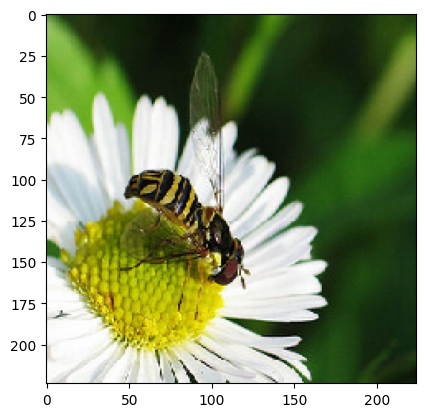

In [16]:
from keras.preprocessing import image 
  
#Creating list for mapping 
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip'] 
  
#Input image 
test_image = image.load_img('flowers/daisy/5547758_eea9edfd54_n.jpg',target_size=(224,224)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = savedModel.predict(test_image) 
print(result) 
  
#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
  if(result[0][i]==1): 
    print(list_[i]) 
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 2.3856657e-19]]
Danelion


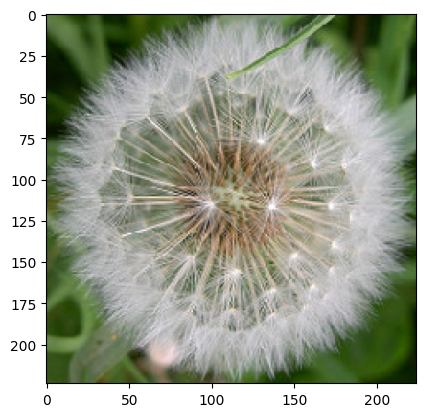

In [17]:
#Input image 
test_image = image.load_img('flowers/dandelion/13920113_f03e867ea7_m.jpg',target_size=(224,224)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = savedModel.predict(test_image) 
print(result) 
  
#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
  if(result[0][i]==1): 
    print(list_[i]) 
    break